# GPGN268 - Geophysical Data Analysis
## Data Story 01 - Well Logging

**Student:** Wade Kahl 

**Collaborators:**

**Date:** March 10th 2024

In [34]:
#Task 1:

#The data that is going to be analyzed was collected and funded by the the union of the multiple countries across many 
#continents and language barriers. Their data collection took place on the coast of New Zealand where they collected 
#various types of data through well-logging. Well logging is a process thay involves multiple sensors, instruments and
#sample collections methods. These are used by either attachment to the drill or they are lowered into the borehole. 
#One of the main reasons for this expedition's use of well logging was to determine the relationship between gas 
#hydrates and submarine landslides. These underwater landslides are considered geohazards and they are not fully 
#understood currently. Pre-expedition, these scientists hypothesised that gas hydrates help cause submarine landslides.

#So, the data collected from this expedition that I'm going to be looking at is from the LWD tools, where they can all
#looked at in a 2D setting with respect to meters below sea floor (mbsf). One being the Neoscope, which produced data 
#on hole size (inches), gamma ray (gAPI), density (g/cm^3) and two different calcuated porosities (%). Another being 
#the GeoVision which produces another set of gamma ray values (gAPI). VP represents the primary or compressional wave 
#with units of velocity. While VS, which is recorded with the SonicScope, represents the shear waves. 

#Porosity can be used to look at thermal conductivty and also geological compostiton like mositure and density.
#Gamma ray data, "provides constraints on lithology that affects the ability of fluids to flow (lower gamma ray 
#indicates coarser grained formations)" Resistivity can locate gas hydrates, as resistivity increases in areas with 
#these hydrates. Looking at the density data, you can see that one section looks like water, as the density is around 
#1 g/cm^3. In general all of these physical measurements of the area surveyed helped characterize the lithostratigraphy 
#and/or help visualize the material below the sea floor. 


In [39]:
#TA Jordan Pettyjohn helped me with the data clean up

import pandas as pd
import numpy as np


path = '/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds01-well-log/data/iodp-logging-data/372-U1517A_cali-nscope.csv'
path2 = '/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds01-well-log/data/iodp-logging-data/372-U1517A_den-nscope.csv'
path3 = '/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds01-well-log/data/iodp-logging-data/372-U1517A_gr-nscope.csv'
path4 = '/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds01-well-log/data/iodp-logging-data/372-U1517A_gr-gvr.csv'
path5 = '/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds01-well-log/data/iodp-logging-data/372-U1517A_por-nscope.csv'
path6 = '/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds01-well-log/data/iodp-logging-data/372-U1517A_res-gvr.csv'
path7 = '/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds01-well-log/data/iodp-logging-data/372-U1517A_res-phase-nscope.csv'
path8 = '/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds01-well-log/data/iodp-logging-data/372-U1517A_res-atten-nscope.csv'
path9 = '/Users/wadekahl/work/classes/GPGN268/coursework-kahl/ds01-well-log/data/iodp-logging-data/372-U1517A_vel-sscope.csv'


df1 = pd.read_csv(path, index_col=0, skiprows=[0,1,2,3,5], usecols= ['DEPTH_LSF', 'UCAV'])

df2 = pd.read_csv(path3, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'GRMA'])

df3 = pd.read_csv(path2, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'RHON'])

df4 = pd.read_csv(path4, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'GR_RAB'])

df5 = pd.read_csv(path5, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'BPHI'])

df6 = pd.read_csv(path5, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'TNPH'])

df7 = pd.read_csv(path6, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'RES_BD'])

df8 = pd.read_csv(path7, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'P16B'])

df9 = pd.read_csv(path8, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'A40B'])

df10 = pd.read_csv(path9, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'VSH']) *1000
df10_meters = df10 * 1000

df11 = pd.read_csv(path9, index_col=0, skiprows=[0,1,2,3,5], usecols = ['DEPTH_LSF', 'VCO']) * 1000
df11_meters = df11 * 1000


test = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]
df_all = pd.concat(test, axis=1)



df_all.head()


,UCAV,GRMA,RHON,GR_RAB,BPHI,TNPH,RES_BD,P16B,A40B,VSH,VCO
DEPTH_LSF,,,,,,,,,,,
0.1348,8.671005,NaN,1.402081,7.57595,NaN,NaN,0.283206,0.609138,0.591475,NaN,NaN
0.2872,8.791258,NaN,1.385705,12.68741,NaN,NaN,0.283637,0.627580,0.624427,NaN,NaN
0.4396,9.234136,1.550004,1.358488,20.45794,78.2805,76.5830,0.349533,0.644199,0.665547,NaN,NaN
0.5920,9.187814,3.260399,1.354235,29.87430,76.7572,73.0690,0.433347,0.663892,0.703513,NaN,NaN
0.7444,8.867629,6.369422,1.368756,34.88909,82.5710,87.7254,0.499190,0.682845,0.740931,NaN,NaN


In [36]:
import matplotlib.pyplot as plt

r = np.abs((df_all['RHON'] - df_all['RHON'].mean()) / df_all['RHON'].std())
df_all.loc[r>3, 'RHON'] = np.NaN

r1 = np.abs((df_all['GRMA'] - df_all['GRMA'].mean()) / df_all['GRMA'].std())
df_all.loc[r1>3, 'GRMA'] = np.NaN

r2 = np.abs((df_all['UCAV'] - df_all['UCAV'].mean()) / df_all['UCAV'].std())
df_all.loc[r2>3, 'UCAV'] = np.NaN

r3 = np.abs((df_all['GR_RAB'] - df_all['GR_RAB'].mean()) / df_all['GR_RAB'].std())
df_all.loc[r3>3, 'GR_RAB'] = np.NaN

r4 = np.abs((df_all['BPHI'] - df_all['BPHI'].mean()) / df_all['BPHI'].std())
df_all.loc[r4>3, 'BPHI'] = np.NaN

r5 = np.abs((df_all['TNPH'] - df_all['TNPH'].mean()) / df_all['TNPH'].std())
df_all.loc[r5>3, 'TNPH'] = np.NaN

r6 = np.abs((df_all['RES_BD'] - df_all['RES_BD'].mean()) / df_all['RES_BD'].std())
df_all.loc[r6>3, 'RES_BD'] = np.NaN

r7 = np.abs((df_all['P16B'] - df_all['P16B'].mean()) / df_all['P16B'].std())
df_all.loc[r7>3, 'P16B'] = np.NaN

r8 = np.abs((df_all['A40B'] - df_all['A40B'].mean()) / df_all['A40B'].std())
df_all.loc[r8>3, 'A40B'] = np.NaN

r9 = np.abs((df_all['VSH'] - df_all['VSH'].mean()) / df_all['VSH'].std())
df_all.loc[r9>3, 'VSH'] = np.NaN

r10 = np.abs((df_all['VCO'] - df_all['VCO'].mean()) / df_all['VCO'].std())
df_all.loc[r10>3, 'VCO'] = np.NaN


nan_num2 = df_all.isna().sum().sum()
print(nan_num2)





64254


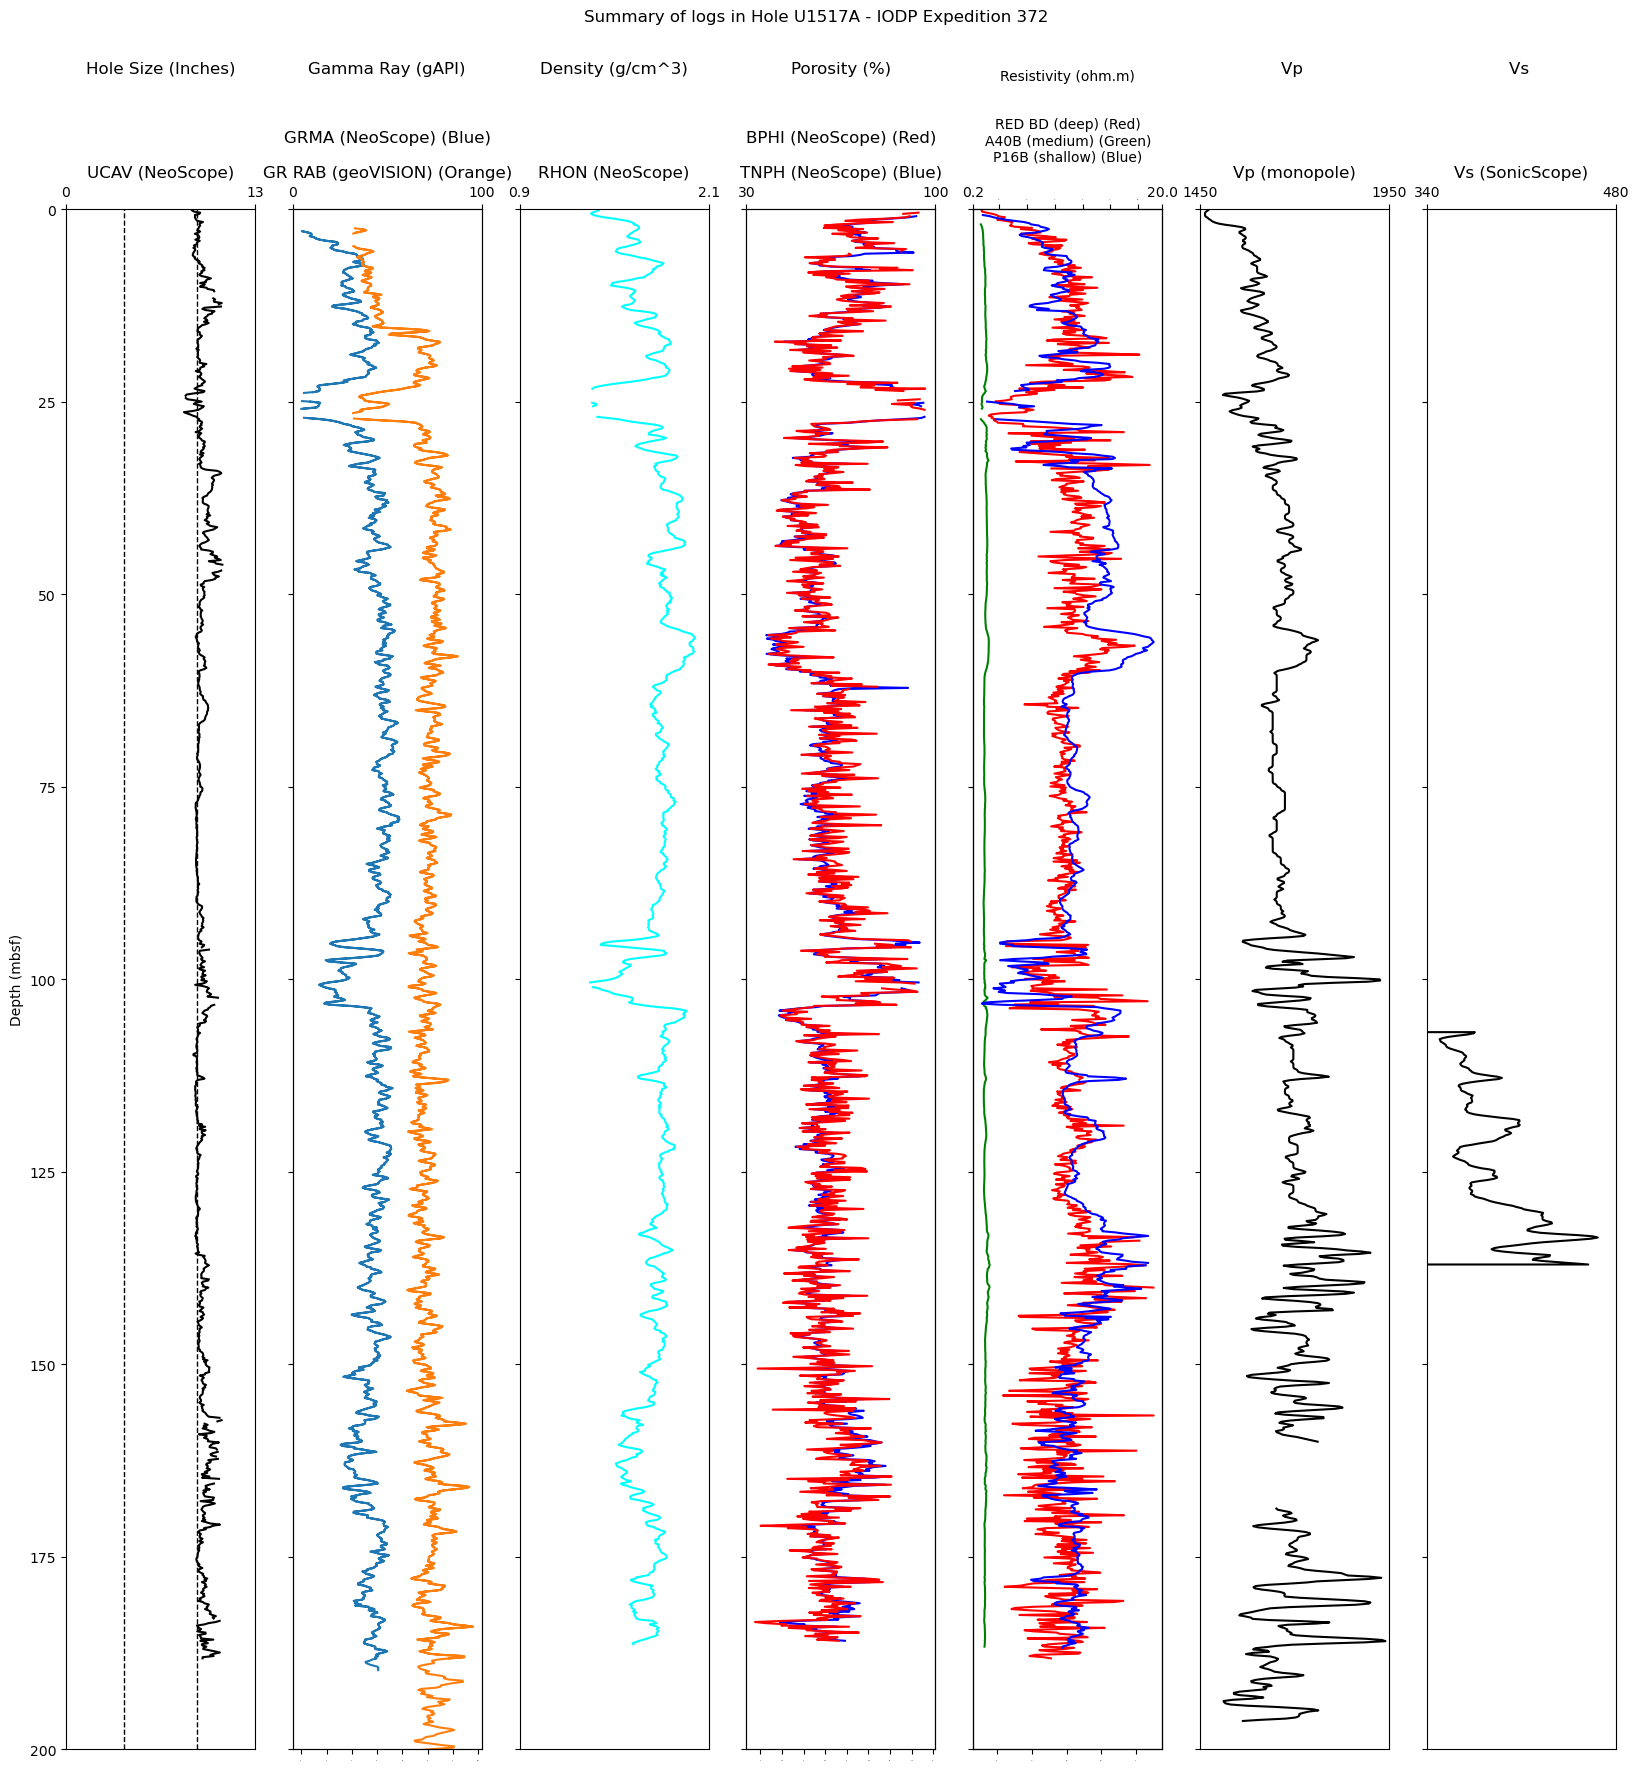

In [37]:
import matplotlib.pyplot as plt
import numpy as np


fig, [ax0, ax1, ax2, ax3, ax4, ax5, ax6] = plt.subplots(1, 7, sharey=True, figsize=(20, 20))
fig.suptitle('Summary of logs in Hole U1517A - IODP Expedition 372')


ax0.plot(df_all['UCAV'], df_all.index,color='black')
ax0.set_title('Hole Size (Inches)\n\n\n\n\n\nUCAV (NeoScope)',color='black')
ax0.xaxis.set_ticks_position('top')
ax0.axvline(x=4, color='k', linestyle='--', linewidth=1)
ax0.axvline(x=9, color='k', linestyle='--', linewidth=1)
ax0.tick_params(axis='x')
ax0.set_xticks([0,13])
ax0.set_ylabel('Depth (mbsf)')



ax1.set_ylim(0,200)
ax1.invert_yaxis()

ax1.plot(df_all['GRMA'], df_all.index)
ax1.set_title('Gamma Ray (gAPI)\n\n\n\nGRMA (NeoScope) (Blue)\n\nGR RAB (geoVISION) (Orange)')
ax1_RAB = ax1.twiny()
ax1.plot(df_all['GR_RAB'], df_all.index)
ax1.set_xlabel(None)
ax1_RAB.tick_params(axis='x')
ax1.tick_params(axis='x', labelsize=0.0000000000000000001)
ax1_RAB.set_xticks([0,100])
#ax1.xaxis.set_ticks_position('top')


ax2.plot(df_all['RHON'], df_all.index,color='cyan')
ax2.set_title('Density (g/cm^3)\n\n\n\n\n\nRHON (NeoScope)',color='black')
ax2.xaxis.set_ticks_position('top')
ax2.set_xticks([0.9,2.1])


ax3.plot(df_all['BPHI'], df_all.index,color='blue')
ax3.set_title('Porosity (%)\n\n\n\nBPHI (NeoScope) (Red)\n\nTNPH (NeoScope) (Blue)',color='black')
ax3.xaxis.set_ticks_position('top')
ax3_T = ax3.twiny()
ax3.plot(df_all['TNPH'], df_all.index,color='red')
ax3.set_xlabel(None)
ax3_T.tick_params(axis='x')
ax3.tick_params(axis='x', labelsize=0.0000000000000000001)
ax3_T.set_xlim([30,100])
ax3_T.set_xticks([30,100])


ax4.plot(df_all['RES_BD'], df_all.index,color='red')
ax4.set_title('Resistivity (ohm.m)\n\n\nRED BD (deep) (Red)\nA40B (medium) (Green)\nP16B (shallow) (Blue)\n',color='black',fontsize=10)
ax4.xaxis.set_ticks_position('top')
ax4_2 = ax4.twiny()
ax4_2.plot(df_all['A40B'], df_all.index,color='green')
ax4.set_xlabel(None)
ax4_2.tick_params(axis='x')
ax4.tick_params(axis='x', labelsize=0.0000000000000000001)
ax4_3 = ax4.twiny()
ax4_3.plot(df_all['P16B'], df_all.index,color='blue')
ax4_2.set_xlim([.2,20])
ax4_2.set_xticks([.2,20])
ax4_3.tick_params(axis='x', labelsize=0.0000000000000000001)


ax5.plot(df_all['VCO'], df_all.index,color='black')
ax5.set_title('Vp \n\n\n\n\n\nVp (monopole)',color='black')
ax5.xaxis.set_ticks_position('top')
ax5.set_xlim([1450,1950])
ax5.set_xticks([1450,1950])

ax6.plot(df_all['VSH'], df_all.index,color='black')
ax6.set_title('Vs \n\n\n\n\n\nVs (SonicScope)',color='black')
ax6.xaxis.set_ticks_position('top')
ax6.set_xlim([340,480])
ax6.set_xticks([340,480])


fig.subplots_adjust(wspace=0.2)

plt.show()



In [38]:
#Interpret the data

#First, I can see a spike just after 20 mbsf across the majority of the graphs. From Prof Dugan's explanation, the RHON
#data cooresponds to the density of water and material together. So, this spike on many of the graphs is water. Around
#this water point, the hole size graph dips inward. This seems like inaccurate data due to this water patch, as it is
#past the paramters of the bit size. The RHON data also shows a realtively high concentration of water around 100 mbsf.
#The GeoVision gamma ray data relates to the radioactivity of the area being drilled across. The team determined the 
#composition was comprised of a lot of clay and sand. So, looking at this gamma ray data, we can see the higher gAPI 
#values represent clay, while the lower gAPI means there is clay there. The UCAV data shows the variance of the borehole
#drill head. So we can see the material being drilled is not consistently even. There is a large gap in the Vs graph, 
#because there was not enough liquid for shear waves to exist in certain regions.

#Also, for the gamma ray data, they have very similar patterns; but the values are not the same. The data from the 
#NeoScope is lower, this could be due to many reason like the sensors' locations and/or incorrect calibrations.
#The porosity data shows a pretty erratic constant changes between high and low porosity. While also showing the two
#sensors getting very similar data. There is also three peaks where porosity is essentially 100 precent, meaning there 
#is material here with almost none void space within. Moreover, the porosity and resistivity graphs have a mild 
#relationship, as they have similar patterns and are somewhat inversely proportional. The Vp graph looks like it has 
#the most activity or changing of values when the Resistivity graphs act the most erratically. The can be seen around 
#20,100 and 125-200 mbsf. This relationship is the most strong between these two, but can be generally seen at these 
#data points across most of the subplots.

#Lastly, the Vp graph represents, how fast p-waves are moving through the system. I can see that p wave velocity 
#increases when there is more water present and there is increased change and activity in the other graphs.
#Another observation about the hole size graph I have is, how are the 2 sides symmetric? If the dotted lines are 
#suppose to represent the extend of the bit size, then the two graphs should be representing two 